### <a name='0'></a>Import biblioteki

In [1]:
!pip install pandas_datareader

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

'1.24.4'

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [3]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [4]:
google = fetch_financial_data('GOOGL')
google

,Open,High,Low,Close,Volume
Date,,,,,
2024-05-31,171.8600,173.0600,169.4400,172.5000,37638876
2024-05-30,175.2000,175.2200,171.7900,172.1100,22958677
2024-05-29,175.4300,176.8360,174.7200,175.9000,23388693
2024-05-28,174.4500,177.2700,174.3650,176.4000,20572157
2024-05-24,174.9800,175.7700,173.6500,174.9900,16579438
...,...,...,...,...,...
2019-06-10,53.8500,54.7420,53.7640,54.1380,28509280
2019-06-07,52.7140,53.6715,52.5575,53.4185,43827140
2019-06-06,52.3105,52.5000,51.7755,52.3880,29020520


### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [5]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2024-05-31 to 2019-06-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [6]:
google.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,105.987724,107.203224,104.862167,106.069368,3.336468e+07
std,30.625534,30.878460,30.349630,30.625048,1.455550e+07
min,52.224500,52.500000,50.443500,52.232000,9.312760e+06
25%,75.875875,76.892175,75.290125,75.933875,2.409801e+07
50%,106.935000,108.509000,105.671000,107.470000,2.973238e+07
75%,133.380000,134.921500,131.769250,133.350750,3.750356e+07
max,177.070000,178.770000,176.080000,177.850000,1.231992e+08


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [7]:
pd.set_option("display.precision", 2)
google.describe()

,Open,High,Low,Close,Volume
count,1258.00,1258.00,1258.00,1258.00,1.26e+03
mean,105.99,107.20,104.86,106.07,3.34e+07
std,30.63,30.88,30.35,30.63,1.46e+07
min,52.22,52.50,50.44,52.23,9.31e+06
25%,75.88,76.89,75.29,75.93,2.41e+07
50%,106.94,108.51,105.67,107.47,2.97e+07
75%,133.38,134.92,131.77,133.35,3.75e+07
max,177.07,178.77,176.08,177.85,1.23e+08


__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [8]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1258.00,1258.00,1258.00,1258.00,1258.00
mean,105.99,107.20,104.86,106.07,33364683.77
std,30.63,30.88,30.35,30.63,14555500.23
min,52.22,52.50,50.44,52.23,9312760.00
25%,75.88,76.89,75.29,75.93,24098006.50
50%,106.94,108.51,105.67,107.47,29732380.00
75%,133.38,134.92,131.77,133.35,37503560.00
max,177.07,178.77,176.08,177.85,123199220.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

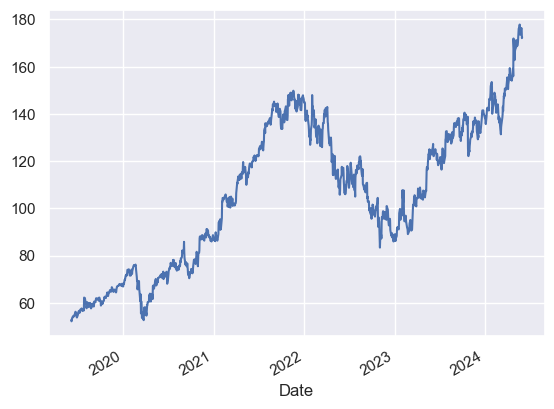

In [9]:
google['Close'].plot();

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [10]:
google = google.reset_index()
google

,Date,Open,High,Low,Close,Volume
0,2024-05-31,171.86,173.06,169.44,172.50,37638876
1,2024-05-30,175.20,175.22,171.79,172.11,22958677
2,2024-05-29,175.43,176.84,174.72,175.90,23388693
3,2024-05-28,174.45,177.27,174.37,176.40,20572157
4,2024-05-24,174.98,175.77,173.65,174.99,16579438
...,...,...,...,...,...,...
1253,2019-06-10,53.85,54.74,53.76,54.14,28509280
1254,2019-06-07,52.71,53.67,52.56,53.42,43827140
1255,2019-06-06,52.31,52.50,51.78,52.39,29020520
1256,2019-06-05,52.75,52.84,51.65,52.23,46988720


Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [11]:
google['Year'] = google['Date'].dt.year
google['Month'] = google['Date'].dt.month
google

,Date,Open,High,Low,Close,Volume,Year,Month
0,2024-05-31,171.86,173.06,169.44,172.50,37638876,2024,5
1,2024-05-30,175.20,175.22,171.79,172.11,22958677,2024,5
2,2024-05-29,175.43,176.84,174.72,175.90,23388693,2024,5
3,2024-05-28,174.45,177.27,174.37,176.40,20572157,2024,5
4,2024-05-24,174.98,175.77,173.65,174.99,16579438,2024,5
...,...,...,...,...,...,...,...,...
1253,2019-06-10,53.85,54.74,53.76,54.14,28509280,2019,6
1254,2019-06-07,52.71,53.67,52.56,53.42,43827140,2019,6
1255,2019-06-06,52.31,52.50,51.78,52.39,29020520,2019,6
1256,2019-06-05,52.75,52.84,51.65,52.23,46988720,2019,6


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [12]:
google.groupby('Year')['Close'].mean()

Year
2019    60.88
2020    73.95
2021   124.22
2022   114.76
2023   118.79
2024   152.08
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

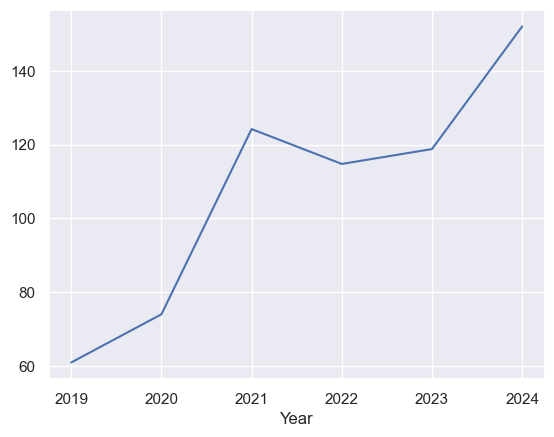

In [13]:
google.groupby('Year')['Close'].mean().plot();

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [14]:
google.groupby('Month')['Close'].mean()

Month
1    107.12
2    110.74
3    106.91
4    113.65
5    118.15
6     97.17
7     98.56
8    104.90
9    103.20
10   101.69
11   105.84
12   105.62
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

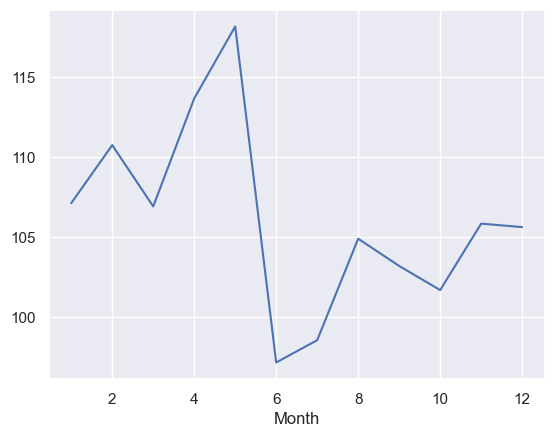

In [15]:
google.groupby('Month')['Close'].mean().plot();

### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [16]:
google.groupby(['Year', 'Month'])['Close'].mean()

Year  Month
2019  6        54.27
      7        57.65
      8        59.11
      9        61.07
      10       61.62
      11       65.14
      12       67.05
2020  1        71.81
      2        73.14
      3        59.26
      4        61.51
      5        69.07
      6        71.58
      7        75.77
      8        77.25
      9        75.58
      10       77.10
      11       87.17
      12       88.39
2021  1        90.01
      2       102.90
      3       102.38
      4       113.65
      5       115.43
      6       121.05
      7       128.56
      8       138.37
      9       141.18
      10      140.11
      11      146.76
      12      145.15
2022  1       135.96
      2       136.71
      3       134.98
      4       128.07
      5       113.19
      6       112.43
      7       112.65
      8       116.26
      9       103.33
      10       98.88
      11       93.91
      12       92.32
2023  1        93.04
      2        96.42
      3        98.06
      4       105.71
 

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [17]:
google['Close'].argmax()

7

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [18]:
google.iloc[[google['Close'].argmax()]]

,Date,Open,High,Low,Close,Volume,Year,Month
7,2024-05-21,176.90,178.15,175.81,177.85,16989369,2024,5


### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [19]:
google[['Date', 'Open', 'Close', 'Volume']]

,Date,Open,Close,Volume
0,2024-05-31,171.86,172.50,37638876
1,2024-05-30,175.20,172.11,22958677
2,2024-05-29,175.43,175.90,23388693
3,2024-05-28,174.45,176.40,20572157
4,2024-05-24,174.98,174.99,16579438
...,...,...,...,...
1253,2019-06-10,53.85,54.14,28509280
1254,2019-06-07,52.71,53.42,43827140
1255,2019-06-06,52.31,52.39,29020520
1256,2019-06-05,52.75,52.23,46988720


### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [20]:
google = google.set_index('Date')
google

,Open,High,Low,Close,Volume,Year,Month
Date,,,,,,,
2024-05-31,171.86,173.06,169.44,172.50,37638876,2024,5
2024-05-30,175.20,175.22,171.79,172.11,22958677,2024,5
2024-05-29,175.43,176.84,174.72,175.90,23388693,2024,5
2024-05-28,174.45,177.27,174.37,176.40,20572157,2024,5
2024-05-24,174.98,175.77,173.65,174.99,16579438,2024,5
...,...,...,...,...,...,...,...
2019-06-10,53.85,54.74,53.76,54.14,28509280,2019,6
2019-06-07,52.71,53.67,52.56,53.42,43827140,2019,6
2019-06-06,52.31,52.50,51.78,52.39,29020520,2019,6


### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [21]:
google = google.drop(columns=['Year', 'Month'])
google

,Open,High,Low,Close,Volume
Date,,,,,
2024-05-31,171.86,173.06,169.44,172.50,37638876
2024-05-30,175.20,175.22,171.79,172.11,22958677
2024-05-29,175.43,176.84,174.72,175.90,23388693
2024-05-28,174.45,177.27,174.37,176.40,20572157
2024-05-24,174.98,175.77,173.65,174.99,16579438
...,...,...,...,...,...
2019-06-10,53.85,54.74,53.76,54.14,28509280
2019-06-07,52.71,53.67,52.56,53.42,43827140
2019-06-06,52.31,52.50,51.78,52.39,29020520


### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [22]:
google.columns = ['Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen']
google

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Date,,,,,
2024-05-31,171.86,173.06,169.44,172.50,37638876
2024-05-30,175.20,175.22,171.79,172.11,22958677
2024-05-29,175.43,176.84,174.72,175.90,23388693
2024-05-28,174.45,177.27,174.37,176.40,20572157
2024-05-24,174.98,175.77,173.65,174.99,16579438
...,...,...,...,...,...
2019-06-10,53.85,54.74,53.76,54.14,28509280
2019-06-07,52.71,53.67,52.56,53.42,43827140
2019-06-06,52.31,52.50,51.78,52.39,29020520
